In [1]:
using JLD2
using Plots
using VoronoiCells
using GeometryBasics
using Meshfree4ScalarEq.ParticleGrids
plotlyjs()

Plots.PlotlyJSBackend()

In [9]:
function getMassLossData(Nx::Integer)
    dataFolder = "$(@__DIR__)/../L2Stability2D/data/"
    algList = Vector{String}(undef, 0)
    fileList = Vector{String}(undef, 0)
    for file in readdir(dataFolder)
        if contains(file, "$(Nx)") && (file[end-2:end] != "txt") && (file[end-2:end] != "pdf")
            alg = split(file, "_")[1]
            push!(algList, alg)
            push!(fileList, dataFolder*file)
        end
    end

    D = Dict{String, Matrix{Float64}}()
    for (j, file) in enumerate(fileList)
        steps = count((contains(t, "step" ) for t in readdir(file * "/data/")))
        data = Matrix{Float64}(undef, steps, 2)
        i = 1
        for dataFile in readdir(file * "/data/")
            if contains(dataFile, "step")
                d = load(file * "/data/" * dataFile)
                data[i, 1] = d["time"]
                data[i, 2] = sum(particle ->  particle.rho*particle.volume, d["particleGrid"].grid)
                i += 1
            end
        end
        # println(algList[j], " ", data)

        # Sort increase time
        perm = sortperm(data[:, 1])
        data[:, 1] .= data[perm, 1]
        data[:, 2] .= data[perm, 2]

        # Normalise 
        data[:, 2] .= data[:, 2]/data[1, 2]

        # Save to dict
        D[algList[j]] = data
    end
    return D, algList
end

getMassLossData (generic function with 2 methods)

In [10]:
D100, algList100 = getMassLossData(100);
D80, algList80 = getMassLossData(80);
D50, algList50 = getMassLossData(50);

(Dict("RK3ClassicUpwind1" => [0.0 1.0; 0.22769154513972636 1.0164506568160487; … ; 28.119905824755925 1.0400569148374563; 28.284271247461902 1.0400194265542513], "RK3WENO" => [0.0 1.0; 0.22769154513972636 1.1026078880751569; … ; 28.119905824755925 1.4849322855018218e36; 28.284271247461902 2.908084392034631e36], "RK3ClassicUpwind2" => [0.0 1.0; 0.22769154513972636 1.0269853082863596; … ; 28.119905824755925 2.785912269020833e171; 28.284271247461902 -2.4888841524533586e172], "MUSCL1" => [0.0 1.0; 0.22769154513972636 1.0079165859892523; … ; 28.119905824755925 -6.264962823541027e21; 28.284271247461902 -9.230287441853671e21], "MUSCL2" => [0.0 1.0; 0.22769154513972636 1.0214169535255537; … ; 28.119905824755925 1.1283010446241733e17; 28.284271247461902 1.581005808720307e17], "RK3PraveenUpwind1" => [0.0 1.0; 0.22769154513972636 1.0068247422201062; … ; 28.119905824755925 0.8612187750300102; 28.284271247461902 0.8604347276018586]), ["MUSCL1", "MUSCL2", "RK3ClassicUpwind1", "RK3ClassicUpwind2", "R

For Nx = 100:
 - MUSCL1: unstable
 - MUSCL2: stable
 - WENO: unstable
 - upwind1: stable
 - upwind2: stable
 - praveen: stable

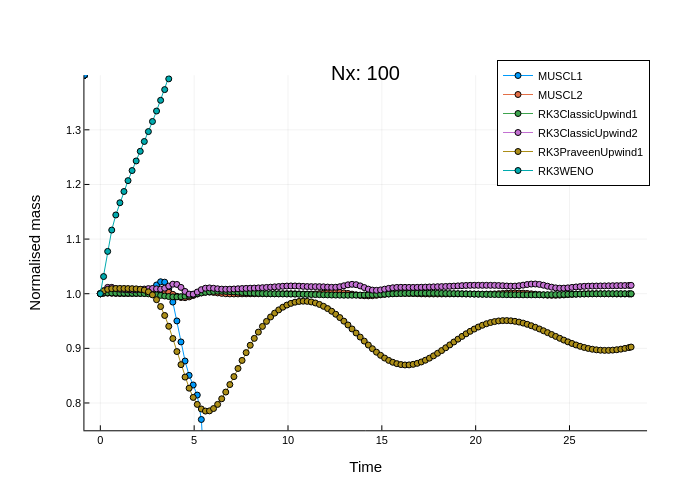

In [25]:
ms = 3
p1 = plot(D100[algList100[1]][:, 1], D100[algList100[1]][:, 2], xlabel="Time", ylabel="Normalised mass", ylim=(0.75, 1.4), label=algList100[1], markershape=:circle, size=(800, 600), legend=:topright, ms=ms, title="Nx: $(100)")
for (j, algStr) in enumerate(algList100)
    if algStr != algList100[1]
        plot!(p1, D100[algStr][:, 1], D100[algStr][:, 2], label=algList100[j], markershape=:circle, ms=ms)
    end
end
display(p1)

For Nx = 80:
 - MUSCL1: stable
 - MUSCL2: stable
 - WENO: stable
 - upwind1: stable
 - upwind2: unstable
 - praveen: stable

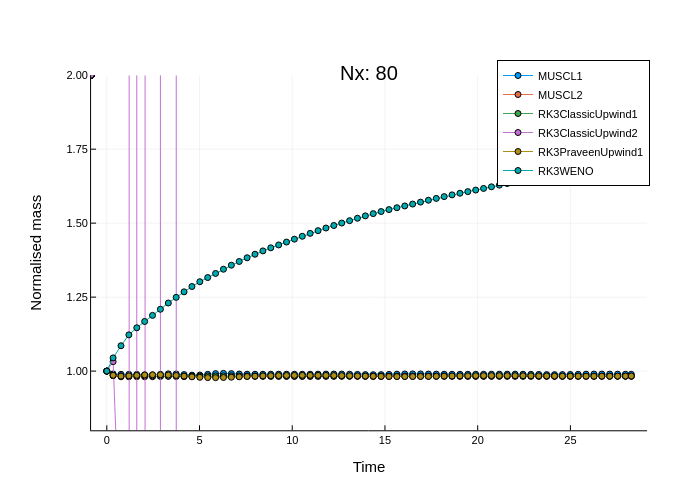

In [22]:
ms = 3
p2 = plot(D80[algList80[1]][:, 1], D80[algList80[1]][:, 2], xlabel="Time", ylabel="Normalised mass", ylim=(0.8, 2.0), label=algList80[1], markershape=:circle, size=(800, 600), legend=:topright, ms=ms, title="Nx: $(80)")
for (j, algStr) in enumerate(algList80)
    if algStr != algList80[1]
        plot!(p2, D80[algStr][:, 1], D80[algStr][:, 2], label=algList80[j], markershape=:circle, ms=ms)
    end
end
display(p2)

For Nx = 50:
 - MUSCL1: unstable
 - MUSCL2: unstable
 - WENO: unstable
 - upwind1: stable
 - upwind2: unstable
 - praveen: stable

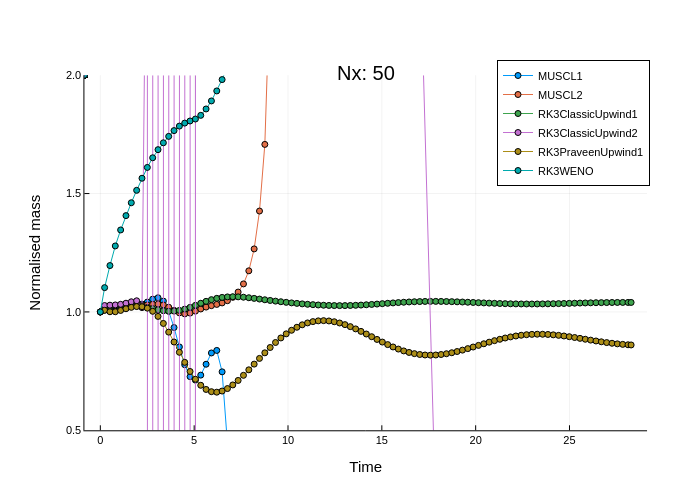

In [16]:
ms = 3
p3 = plot(D50[algList50[1]][:, 1], D50[algList50[1]][:, 2], xlabel="Time", ylabel="Normalised mass", ylim=(0.5, 2.0), label=algList50[1], markershape=:circle, size=(800, 600), legend=:topright, ms=ms, title="Nx: $(50)")
for (j, algStr) in enumerate(algList50)
    if algStr != algList50[1]
        plot!(p3, D50[algStr][:, 1], D50[algStr][:, 2], label=algList50[j], markershape=:circle, ms=ms)
    end
end
display(p3)